In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/chest_xray/train'
test_path = "/content/drive/MyDrive/chest_xray/test"


train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    shuffle=True,
    class_mode='categorical',
    batch_size=8,
    subset='training'
)

val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    shuffle=False,
    class_mode='categorical',
    batch_size=8,
    subset='validation'
)


test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(100,100),
    shuffle=True,
    class_mode='categorical',
    batch_size=1
)

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
val_datagen

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights="imagenet", include_top=False )

In [ ]:
from tensorflow.keras.layers import Dropout , GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D , BatchNormalization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(3, activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Sequential , Model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:

model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_190 (BatchN (None, None, None, 3 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, None, None, 3 0           batch_normalization_190[0][0]    
_______________________________________________________________________________________

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//8,
    validation_data = val_generator,
    epochs = 10,
    validation_steps = val_generator.samples//8
)

Epoch 1/10
588/588 [==============================] - 290s 494ms/step - loss: 0.9710 - accuracy: 0.5548 - val_loss: 0.9427 - val_accuracy: 0.5942
Epoch 2/10
588/588 [==============================] - 281s 478ms/step - loss: 0.8117 - accuracy: 0.6339 - val_loss: 0.7917 - val_accuracy: 0.6288
Epoch 3/10
588/588 [==============================] - 301s 513ms/step - loss: 0.8254 - accuracy: 0.6304 - val_loss: 4636.4907 - val_accuracy: 0.2577
Epoch 4/10
588/588 [==============================] - 295s 502ms/step - loss: 0.8802 - accuracy: 0.5975 - val_loss: 0.9526 - val_accuracy: 0.5346
Epoch 5/10
588/588 [==============================] - 302s 513ms/step - loss: 0.8517 - accuracy: 0.6209 - val_loss: 3.7725 - val_accuracy: 0.5635
Epoch 6/10
588/588 [==============================] - 296s 504ms/step - loss: 0.8731 - accuracy: 0.6037 - val_loss: 1.3335 - val_accuracy: 0.6154
Epoch 7/10
588/588 [==============================] - 289s 491ms/step - loss: 0.9163 - accuracy: 0.5784 - val_loss: 1.618

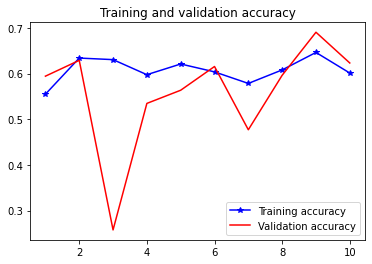

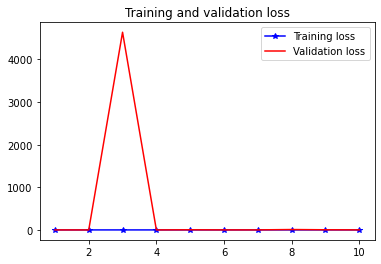

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_generator(generator=test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
cm=confusion_matrix(y_true,y_pred)

print(cm)

Instructions for updating:
Please use Model.predict, which supports generators.
[[130 104   0]
 [137 105   0]
 [ 87  61   0]]


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict_generator(generator=test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
target_names = ['class1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      class1       0.35      0.53      0.42       234
     class 2       0.36      0.40      0.38       242
     class 3       0.00      0.00      0.00       148

    accuracy                           0.35       624
   macro avg       0.24      0.31      0.27       624
weighted avg       0.27      0.35      0.30       624



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
